In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('voltedge_energy_usage_P6.csv')

print("Dataset Loaded Successfully.")


Dataset Loaded Successfully.


In [3]:
print("\n--- First 5 Rows ---")
print(df.head())



--- First 5 Rows ---
            Timestamp  Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW
0  2020-01-01 0:00:00     18.576412           0     0        519.524110
1  2020-01-01 1:00:00     40.572217           1     1        631.595039
2  2020-01-01 2:00:00     22.832619           0     2        585.525686
3  2020-01-01 3:00:00     33.298120           0     3        756.287306
4  2020-01-01 4:00:00     18.453781           0     4        735.272942


In [4]:
print("\n--- Dataset Info ---")
df.info()



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33889 entries, 0 to 33888
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         33889 non-null  object 
 1   Outdoor_Temp      33889 non-null  float64
 2   Is_Holiday        33889 non-null  int64  
 3   Hour              33889 non-null  int64  
 4   Energy_Demand_MW  33889 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [5]:
print("\n--- Statistical Summary ---")
print(df.describe())



--- Statistical Summary ---
       Outdoor_Temp    Is_Holiday          Hour  Energy_Demand_MW
count  33889.000000  33889.000000  33889.000000      33889.000000
mean      20.028071      0.049397     11.499661        342.122846
std       10.029474      0.216698      6.922468        223.105184
min      -29.203402      0.000000      0.000000       -285.400267
25%       13.299488      0.000000      5.000000        190.956009
50%       20.042065      0.000000     11.000000        342.369792
75%       26.825715      0.000000     17.000000        508.241832
max       57.674909      1.000000     23.000000       1042.834076


In [6]:
print("\n--- Missing Values Count ---")
print(df.isnull().sum())



--- Missing Values Count ---
Timestamp           0
Outdoor_Temp        0
Is_Holiday          0
Hour                0
Energy_Demand_MW    0
dtype: int64


In [7]:
print("\n--- Duplicate Rows ---")
print("Number of duplicate rows:", df.duplicated().sum())



--- Duplicate Rows ---
Number of duplicate rows: 0


In [8]:
print("Duplicates before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicates after removal:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)


Duplicates before removal: 0
Duplicates after removal: 0
Shape after removing duplicates: (33889, 5)


In [9]:
df['Timestamp'] = pd.to_datetime(
    df['Timestamp'],
    dayfirst=True,
    errors='coerce'   # Converts invalid values to NaT instead of crashing
)


In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek


In [11]:
df = df.sort_values('Timestamp')

df['Lag_1'] = df['Energy_Demand_MW'].shift(1)
df['Lag_24'] = df['Energy_Demand_MW'].shift(24)

df = df.dropna()


In [12]:
print("Invalid timestamps (if any):")
print(df['Timestamp'].isnull().sum())


Invalid timestamps (if any):
0


In [13]:
df = df.dropna(subset=['Timestamp'])


In [14]:
X = df.drop(['Energy_Demand_MW', 'Timestamp'], axis=1)
y = df['Energy_Demand_MW']


In [15]:
df['Timestamp'].isnull().sum()


np.int64(0)

In [16]:
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek


In [17]:
df.drop('Timestamp', axis=1, inplace=True)

print("Timestamp column dropped.")


Timestamp column dropped.


In [18]:
print("\n--- Dataset Info After Cleaning ---")
df.info()

print("\n--- First 5 Rows After Cleaning ---")
print(df.head())



--- Dataset Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 13512 entries, 744 to 33887
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Outdoor_Temp      13512 non-null  float64
 1   Is_Holiday        13512 non-null  int64  
 2   Hour              13512 non-null  int32  
 3   Energy_Demand_MW  13512 non-null  float64
 4   Day               13512 non-null  int32  
 5   Month             13512 non-null  int32  
 6   Day_of_Week       13512 non-null  float64
 7   Lag_1             13512 non-null  float64
 8   Lag_24            13512 non-null  float64
 9   DayOfWeek         13512 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 950.1 KB

--- First 5 Rows After Cleaning ---
     Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW  Day  Month  \
744     23.083615           0     0        433.709402    2      1   
745      5.774786           0     1        512.411405   

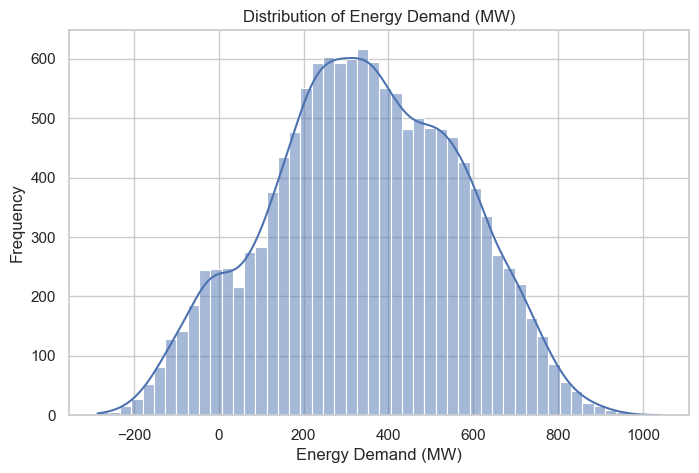

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Energy_Demand_MW'], kde=True)
plt.title("Distribution of Energy Demand (MW)")
plt.xlabel("Energy Demand (MW)")
plt.ylabel("Frequency")
plt.show()


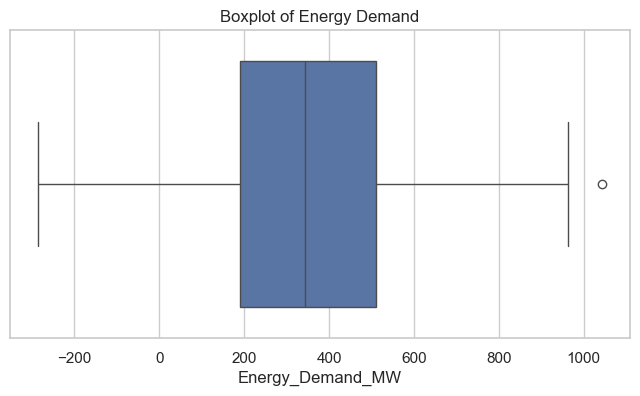

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Energy_Demand_MW'])
plt.title("Boxplot of Energy Demand")
plt.show()


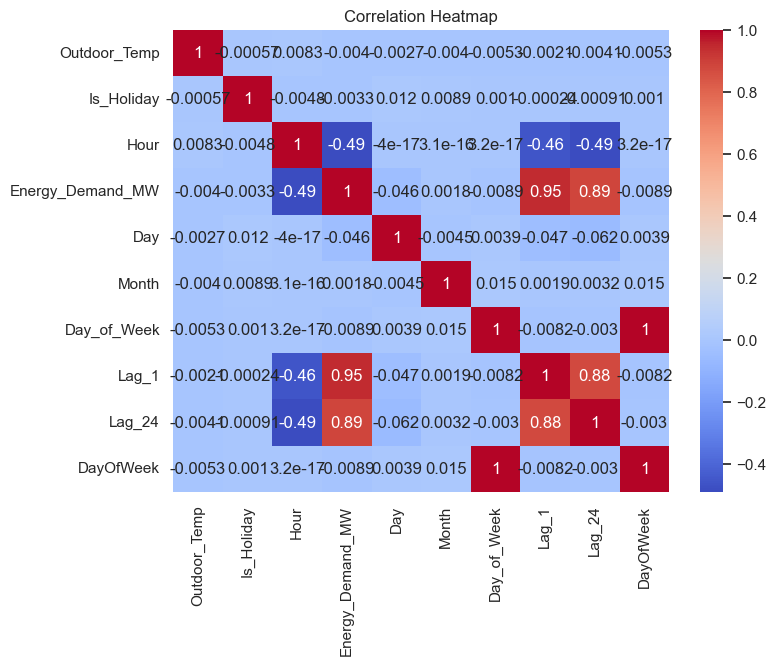

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


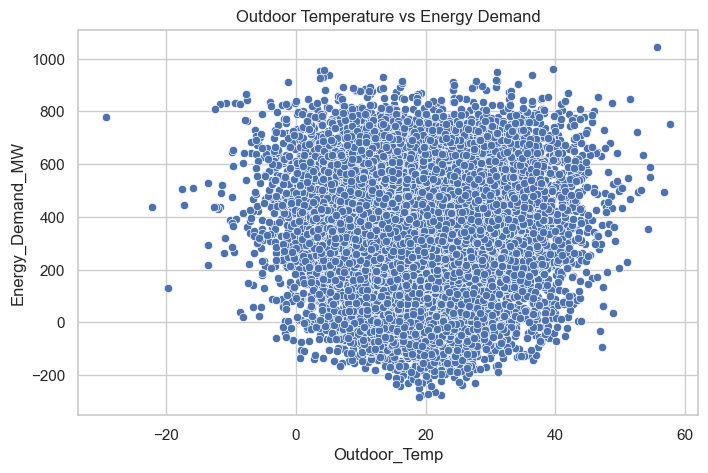

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Outdoor_Temp'], y=df['Energy_Demand_MW'])
plt.title("Outdoor Temperature vs Energy Demand")
plt.show()


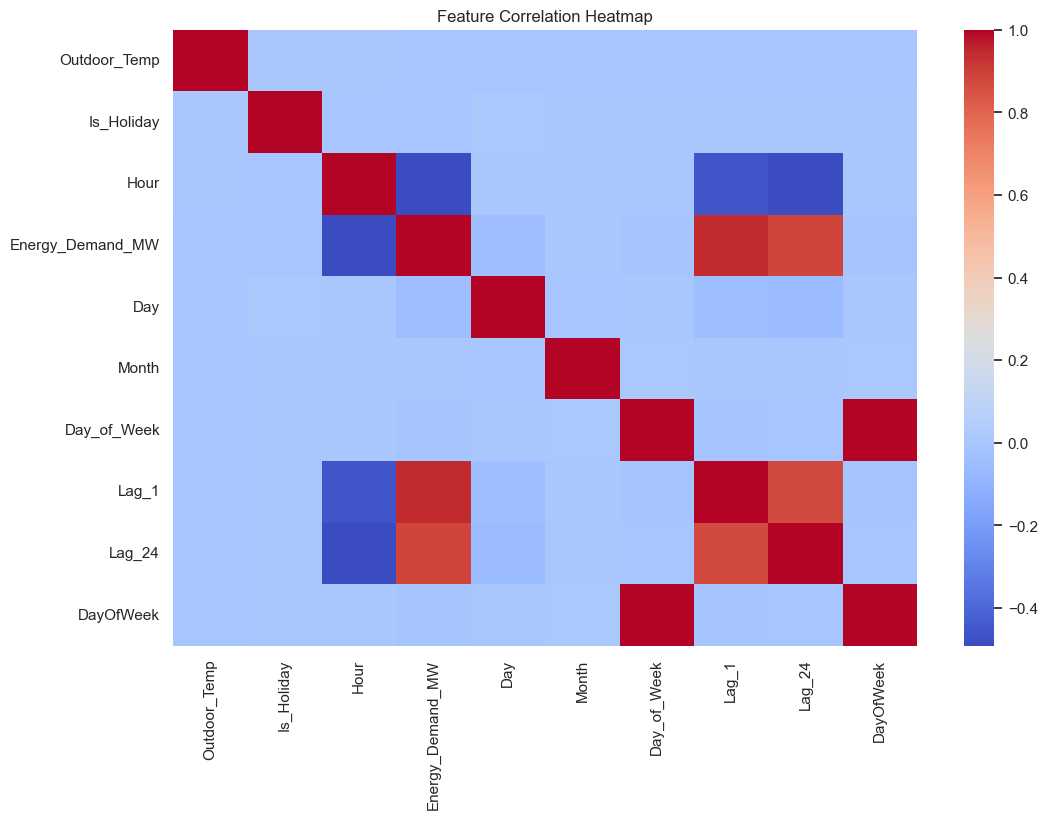

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


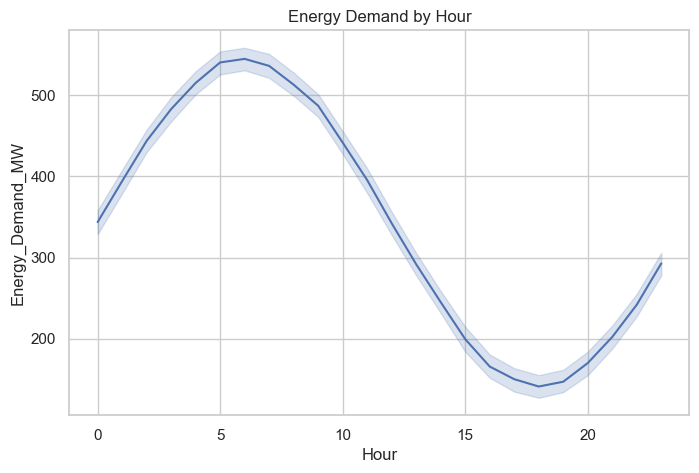

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Hour', y='Energy_Demand_MW', data=df)
plt.title("Energy Demand by Hour")
plt.show()


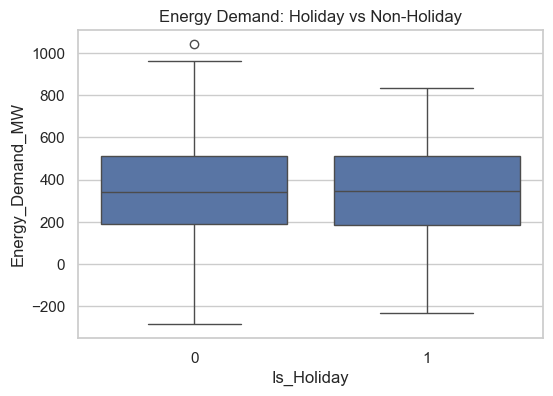

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Is_Holiday', y='Energy_Demand_MW', data=df)
plt.title("Energy Demand: Holiday vs Non-Holiday")
plt.show()


In [26]:
Q1 = df['Energy_Demand_MW'].quantile(0.25)
Q3 = df['Energy_Demand_MW'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers = df[(df['Energy_Demand_MW'] < lower_limit) | 
              (df['Energy_Demand_MW'] > upper_limit)]

print("Number of Outliers:", len(outliers))


Lower Limit: -292.80815508750004
Upper Limit: 993.0268108125
Number of Outliers: 1


In [27]:
df['Rolling_Mean_3'] = df['Energy_Demand_MW'].rolling(3).mean()
df['Rolling_Std_3'] = df['Energy_Demand_MW'].rolling(3).std()

df = df.dropna()


In [28]:
df = df[(df['Energy_Demand_MW'] >= lower_limit) &
        (df['Energy_Demand_MW'] <= upper_limit)]

print("Rows after removing outlier:", len(df))


Rows after removing outlier: 13509


In [29]:
df['Temp_Hour_Interaction'] = df['Outdoor_Temp'] * df['Hour']

print(df[['Outdoor_Temp', 'Hour', 'Temp_Hour_Interaction']].head())


     Outdoor_Temp  Hour  Temp_Hour_Interaction
746     26.500611     2              53.001221
747     31.102624     3              93.307871
748     -6.358486     4             -25.433943
749     18.179013     5              90.895065
750     21.718940     6             130.313641


In [30]:
df['Temp_Squared'] = df['Outdoor_Temp'] ** 2

print(df[['Outdoor_Temp', 'Temp_Squared']].head())


     Outdoor_Temp  Temp_Squared
746     26.500611    702.282357
747     31.102624    967.373194
748     -6.358486     40.430341
749     18.179013    330.476515
750     21.718940    471.712360


In [31]:
print(df.head())
print(df.info())


     Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW  Day  Month  \
746     26.500611           0     2        537.278071    2      1   
747     31.102624           0     3        595.780853    2      1   
748     -6.358486           0     4        727.871688    2      1   
749     18.179013           0     5        633.427473    2      1   
750     21.718940           0     6        583.341090    2      1   

     Day_of_Week       Lag_1      Lag_24  DayOfWeek  Rolling_Mean_3  \
746          3.0  512.411405  585.525686          3      494.466293   
747          3.0  537.278071  756.287306          3      548.490109   
748          3.0  595.780853  735.272942          3      620.310204   
749          3.0  727.871688  722.888741          3      652.360004   
750          3.0  633.427473  759.688211          3      648.213417   

     Rolling_Std_3  Temp_Hour_Interaction  Temp_Squared  
746      54.066048              53.001221    702.282357  
747      42.800684              93.307871 

In [32]:
X = df.drop('Energy_Demand_MW', axis=1)
y = df['Energy_Demand_MW']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (13509, 13)
Target shape: (13509,)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Scaling completed.")
print("First 5 rows of scaled data:")
print(X_scaled[:5])


Scaling completed.
First 5 rows of scaled data:
[[ 0.65051014 -0.22645981 -1.37285309 -1.29651334 -1.59862374 -0.01161287
   0.7558851   1.08438225 -0.01161287  0.69179836  0.10170637 -0.92544774
   0.47899819]
 [ 1.11191536 -0.22645981 -1.22837433 -1.29651334 -1.59862374 -0.01161287
   0.8666595   1.84621206 -0.01161287  0.93809226 -0.30067875 -0.71561302
   1.1066575 ]
 [-2.64399562 -0.22645981 -1.08389556 -1.29651334 -1.59862374 -0.01161287
   1.12727387  1.75245932 -0.01161287  1.26551917  1.65796483 -1.33377789
  -1.08807814]
 [-0.18382659 -0.22645981 -0.93941679 -1.29651334 -1.59862374 -0.01161287
   1.71570349  1.69720889 -0.01161287  1.41163381  0.60120277 -0.72817398
  -0.40133173]
 [ 0.17109219 -0.22645981 -0.79493803 -1.29651334 -1.59862374 -0.01161287
   1.29497957  1.86138473 -0.01161287  1.39272957  0.79197082 -0.52296254
  -0.06692564]]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (10807, 13)
Testing shape: (2702, 13)


In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("PCA transformation completed.")


PCA transformation completed.


In [36]:
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:")
print(explained_variance)


Explained Variance Ratio:
[2.67862062e-01 1.76774918e-01 1.53786325e-01 8.48209370e-02
 7.84374606e-02 7.73669917e-02 7.53984926e-02 6.27136920e-02
 1.14350258e-02 6.72923578e-03 3.80371986e-03 8.71139011e-04
 1.70790898e-17]


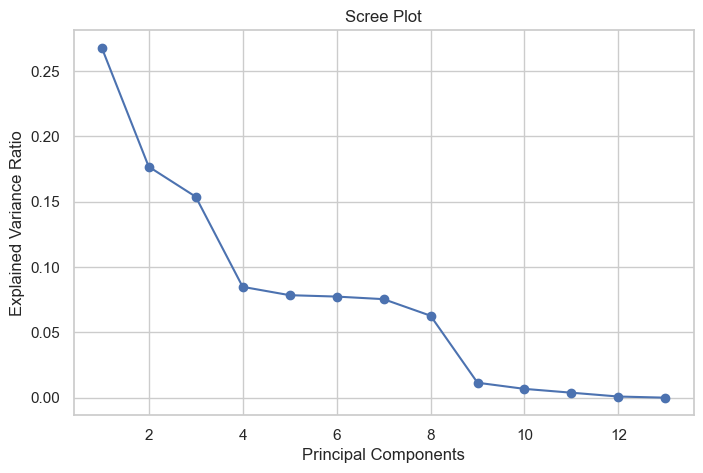

In [37]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


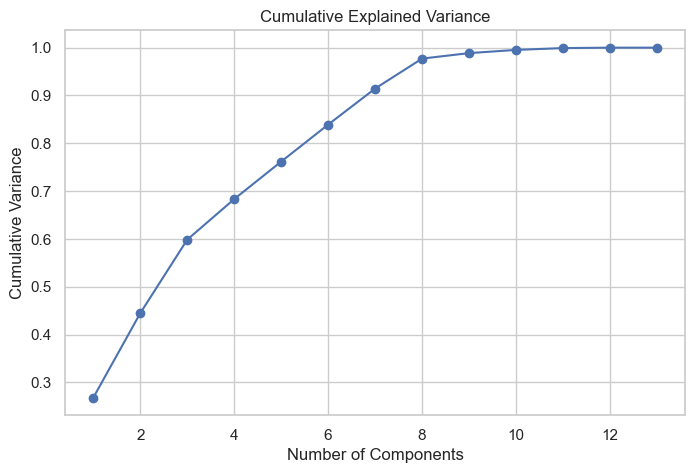

In [38]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()


In [39]:
pca = PCA(n_components=4)
X_pca_final = pca.fit_transform(X_scaled)


In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_final, y, 
    test_size=0.2, 
    random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 35.30941463503473
MSE: 1948.4920844477454
RMSE: 44.141727248123686
R2 Score: 0.9602115479283936


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred_poly))


R2: 0.981615892116484


In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))


Ridge R2: 0.9602184251831796
Lasso R2: 0.9602826189392446


In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression Results:
MAE: 35.30717052532137
MSE: 1948.1552963643817
RMSE: 44.13791223386514
R2 Score: 0.9602184251831796


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)

cv_scores = cross_val_score(ridge, X, y, cv=kf, scoring='r2')

print("CV R2 Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


CV R2 Scores: [0.92562278 0.95044649 0.94701969 0.95128558 0.92014528]
Mean CV Score: 0.9389039628724138


In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
MAE: 15.44189907766229
MSE: 507.7582372880462
RMSE: 22.533491458006374
R2 Score: 0.9896315132868375


In [47]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_lr_pca = lr_pca.predict(X_test_pca)

print("\nLinear Regression with PCA:")
print("R2 Score:", r2_score(y_test_pca, y_pred_lr_pca))



Linear Regression with PCA:
R2 Score: 0.9033533222150169


In [48]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Time-series split (proper for forecasting)
tscv = TimeSeriesSplit(n_splits=3)

rf_base = RandomForestRegressor(
    n_estimators=30,      # reduced for speed
    max_depth=10,         # prevents overfitting + speeds up
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(
    rf_base,
    X_train,
    y_train,
    cv=tscv,
    scoring='r2'
)

print("Cross-validation R2 scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


Cross-validation R2 scores: [0.98117107 0.98400018 0.98763209]
Average CV R2: 0.9842677808645212


In [49]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

# Proper time-series split
tscv = TimeSeriesSplit(n_splits=3)

param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(
    n_estimators=30,      # reduced from 100 (faster)
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,              # time-series safe
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2}
Best CV Score: 0.9756404520575274


In [50]:
best_rf = grid_search.best_estimator_

y_pred_final = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\nFinal Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))
print("R2:", r2_score(y_test, y_pred_final))



Final Tuned Random Forest Performance:
MAE: 23.576804918545893
RMSE: 30.601602651693284
R2: 0.9808774087800477


In [51]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by='Importance',
    ascending=False
)

print(feature_importance)


                  Feature  Importance
6                   Lag_1    0.375371
9          Rolling_Mean_3    0.291999
7                  Lag_24    0.182273
2                    Hour    0.090815
11  Temp_Hour_Interaction    0.018986
10          Rolling_Std_3    0.010602
3                     Day    0.009256
0            Outdoor_Temp    0.008207
12           Temp_Squared    0.007586
4                   Month    0.002033
8               DayOfWeek    0.001391
5             Day_of_Week    0.001275
1              Is_Holiday    0.000206


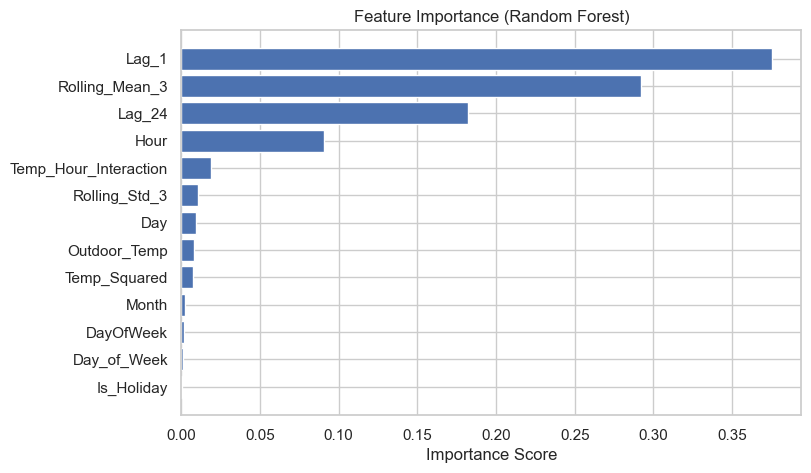

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'],
         feature_importance['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


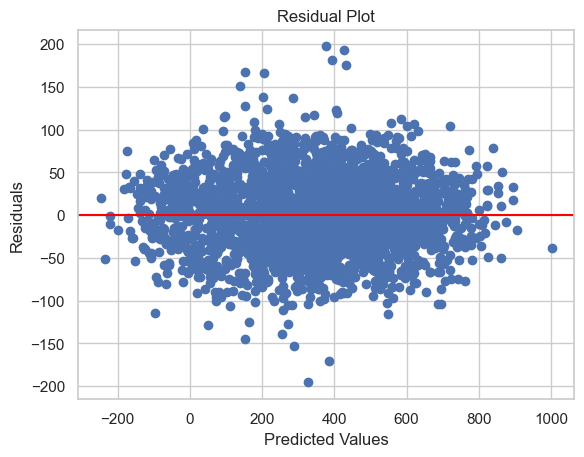

In [53]:
residuals = y_test - y_pred_ridge

plt.scatter(y_pred_ridge, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


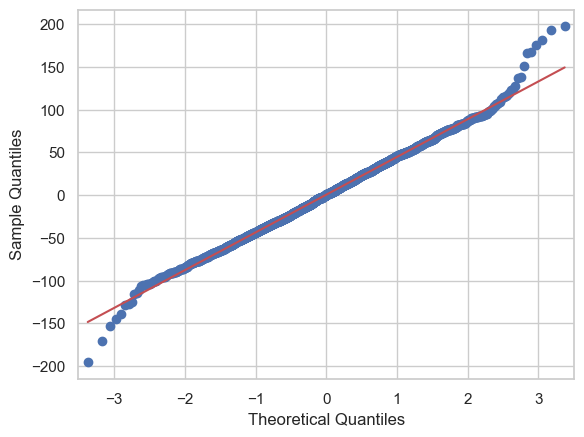

In [54]:
##!pip install statsmodels

import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.show()


In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Lasso Model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


y_pred_lasso = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso R2: 0.9602253050744279
Lasso RMSE: 44.134095427118886


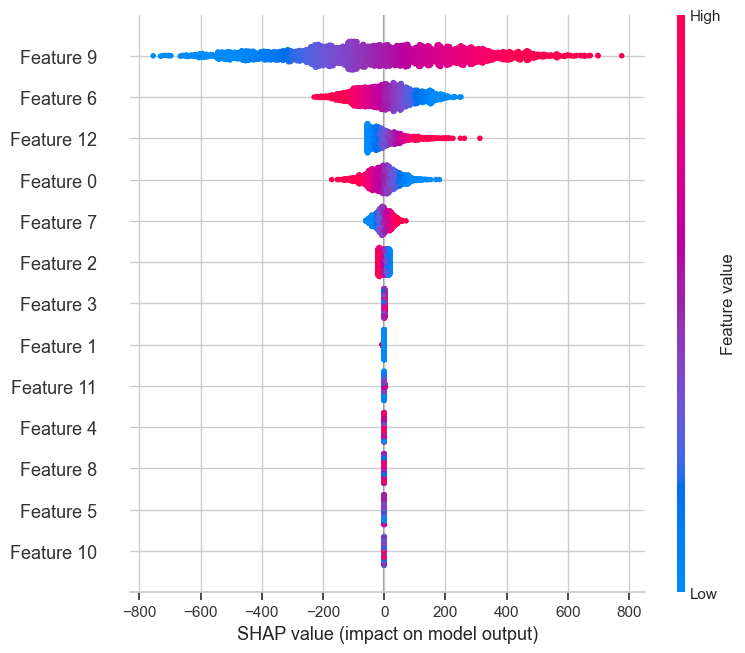

In [56]:

import shap
explainer = shap.Explainer(ridge, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)



In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf)


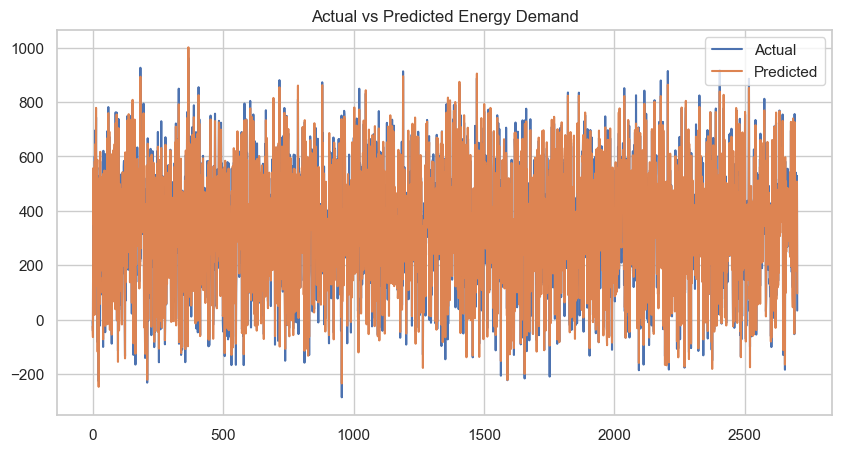

In [58]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_ridge, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Demand")
plt.show()


In [59]:
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_final)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_final))
    ]
})

print(model_results)


               Model  R2 Score       RMSE
0  Linear Regression  0.960212  44.141727
1   Ridge Regression  0.960218  44.137912
2      Random Forest  0.980877  30.601603


In [60]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
})

results


,Model,R2
0,Linear,0.960212
1,Ridge,0.960218
2,Lasso,0.960225


In [61]:
print("Top 5 Important Features:")
print(pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(ridge.coef_)
}).sort_values(by="Importance", ascending=False).head())


Top 5 Important Features:
           Feature  Importance
9   Rolling_Mean_3  277.801354
6            Lag_1   87.939873
12    Temp_Squared   48.341412
0     Outdoor_Temp   45.965883
7           Lag_24   23.279049


In [98]:

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_pipeline.named_steps['model'].coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

importance.head(10)


,Feature,Coefficient
9,Rolling_Mean_3,278.813515
6,Lag_1,-88.202365
12,Temp_Squared,48.017078
0,Outdoor_Temp,-45.773065
7,Lag_24,23.327881
2,Hour,-12.130502
1,Is_Holiday,-1.103157
3,Day,0.824597
11,Temp_Hour_Interaction,0.259368
4,Month,-0.104034


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10]}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Alpha:", grid.best_params_)


Best Alpha: {'alpha': 0.1}


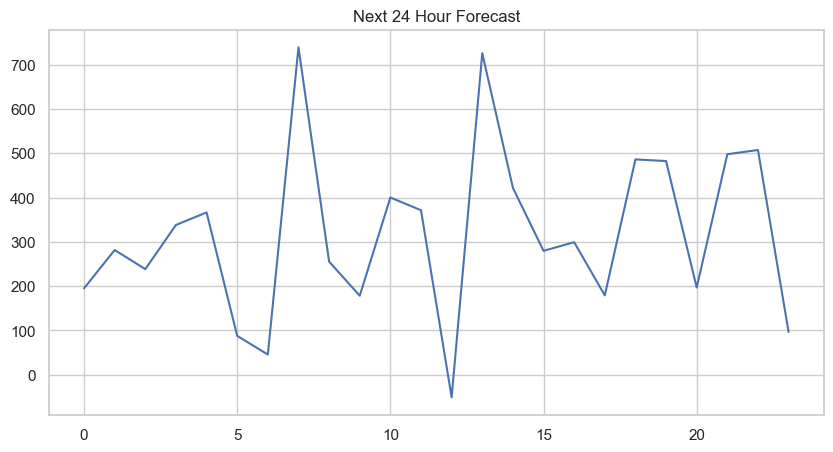

In [70]:
future_input = X_test[-24:].copy()


# Normal 24-hour prediction
future_prediction = ridge.predict(future_input)

plt.figure(figsize=(10,5))
plt.plot(future_prediction)
plt.title("Next 24 Hour Forecast")
plt.show()


In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)

future_prediction = ridge_pipeline.predict(future_input)
spike_prediction = ridge_pipeline.predict(simulated)


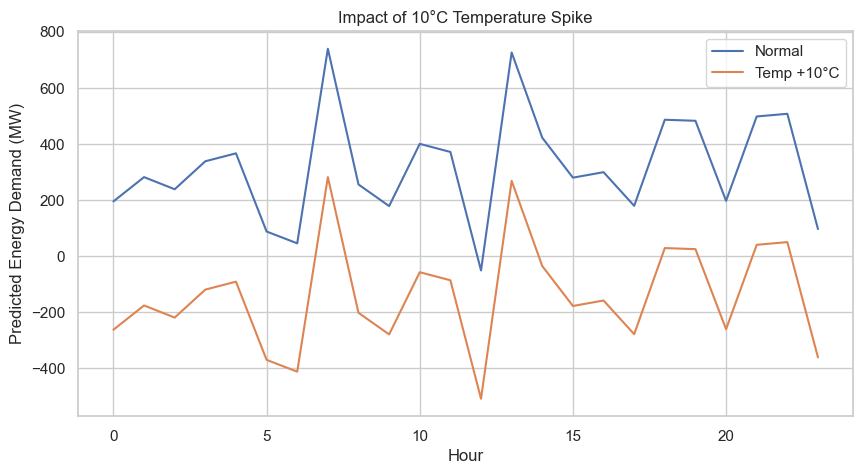

In [88]:
# Take last 24 hours
future_input = X_test.tail(24).copy()

# Normal prediction
future_prediction = ridge_pipeline.predict(future_input)

# Simulate +10°C spike
simulated = future_input.copy()
simulated['Outdoor_Temp'] += 10

# Predict after spike
spike_prediction = ridge_pipeline.predict(simulated)

# Plot
plt.figure(figsize=(10,5))
plt.plot(future_prediction, label="Normal")
plt.plot(spike_prediction, label="Temp +10°C")
plt.legend()
plt.title("Impact of 10°C Temperature Spike")
plt.xlabel("Hour")
plt.ylabel("Predicted Energy Demand (MW)")
plt.show()


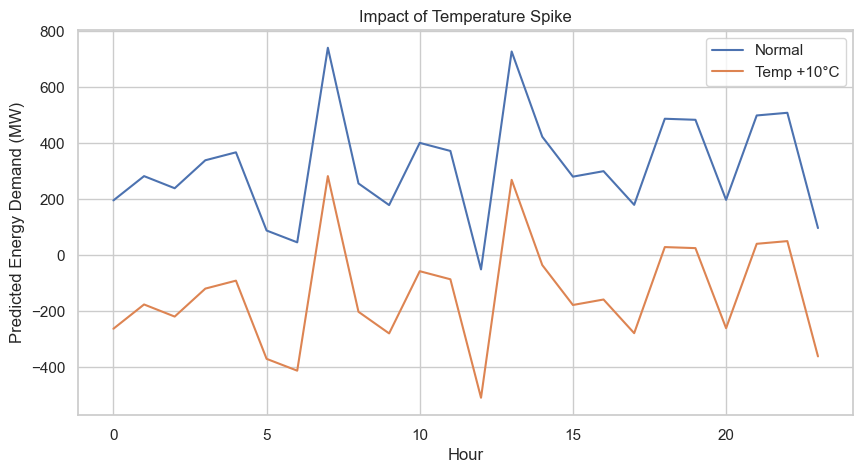

In [89]:
# Take last 24 hours safely
future_input = X_test.tail(24).copy()

# Normal prediction
future_prediction = ridge_pipeline.predict(future_input)

# Simulate +10°C spike
simulated = future_input.copy()
simulated['Outdoor_Temp'] += 10

# Predict spike impact
spike_prediction = ridge_pipeline.predict(simulated)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(future_prediction, label="Normal")
plt.plot(spike_prediction, label="Temp +10°C")
plt.legend()
plt.title("Impact of Temperature Spike")
plt.xlabel("Hour")
plt.ylabel("Predicted Energy Demand (MW)")
plt.show()


In [96]:
results = pd.DataFrame({
    "Model": ["Linear", "Polynomial", "Ridge", "Lasso"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
})

results


,Model,R2 Score
0,Linear,0.960212
1,Polynomial,0.981616
2,Ridge,0.960218
3,Lasso,0.960225


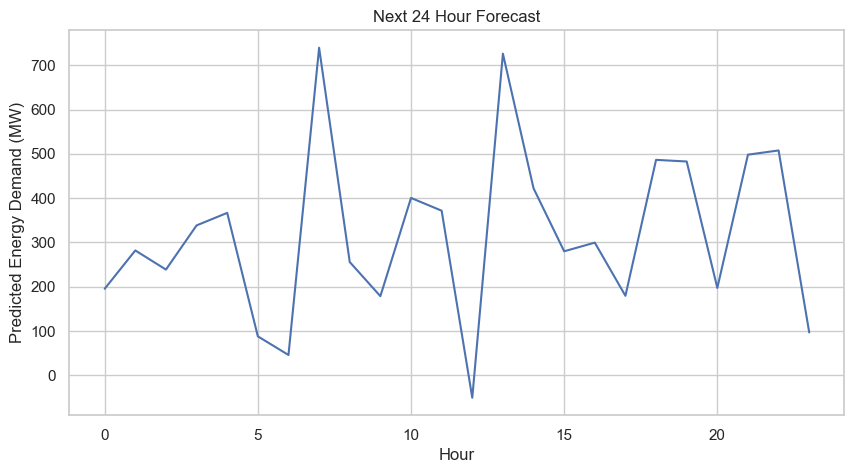

In [90]:
future_input = X_test.tail(24).copy()

future_prediction = ridge_pipeline.predict(future_input)

plt.figure(figsize=(10,5))
plt.plot(future_prediction)
plt.title("Next 24 Hour Forecast")
plt.xlabel("Hour")
plt.ylabel("Predicted Energy Demand (MW)")
plt.show()


In [97]:
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge MAE: 35.30717052532137
Ridge RMSE: 44.13791223386514


In [91]:
import joblib

joblib.dump(best_rf, "energy_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


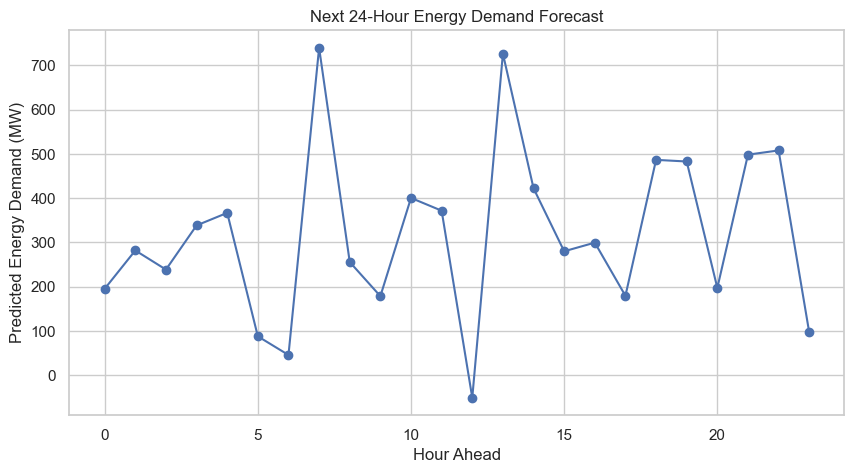

In [99]:
plt.figure(figsize=(10,5))
plt.plot(range(24), future_prediction, marker='o')
plt.title("Next 24-Hour Energy Demand Forecast")
plt.xlabel("Hour Ahead")
plt.ylabel("Predicted Energy Demand (MW)")
plt.grid(True)
plt.show()


In [100]:
import joblib

joblib.dump(ridge_pipeline, "ridge_model.pkl")


['ridge_model.pkl']

In [102]:
ridge_pipeline.feature_names_in_


array(['Outdoor_Temp', 'Is_Holiday', 'Hour', 'Day', 'Month',
       'Day_of_Week', 'Lag_1', 'Lag_24', 'DayOfWeek', 'Rolling_Mean_3',
       'Rolling_Std_3', 'Temp_Hour_Interaction', 'Temp_Squared'],
      dtype=object)